In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from src.utils.dicom import *
from src.utils.crop import *
from glob import glob
from src.utils.preprocessing import truncate_normalization
from src.utils.crop import *

data_dir = '/mnt/d/datasets/CBIS/data'
mask_sample_path = os.path.join(data_dir, 'CBIS-DDSM/Mass-Training_P_01221_LEFT_CC_1/07-21-2016-DDSM-NA-02934/1.000000-ROI mask images-77280')
img_sample_path = os.path.join(data_dir, 'CBIS-DDSM/Mass-Training_P_01221_LEFT_CC/07-20-2016-DDSM-NA-68911/1.000000-full mammogram images-82675')

# 1. Load image, crop and normalize breast region
image = load_dicom_image(glob(img_sample_path + '/*.dcm')[0])
cropped_image, cropped_roi, bounding_box = crop_to_roi(image)
normalized_image = truncate_normalization(
    cropped_image, cropped_roi)

# 2. Load mask, crop using the cropped image bounding box
mask = load_dicom_mask(glob(mask_sample_path + '/*.dcm'), image.shape)
cropped_mask = crop_img(mask, bounding_box)

# 3. Extract normalized patch from using cropped mask
patch = extract_patch(normalized_image, cropped_mask)
crops_size = min(patch.shape) - 10
patches = [random_crop(patch, size=(
    crops_size, crops_size)) for i in range(3)]

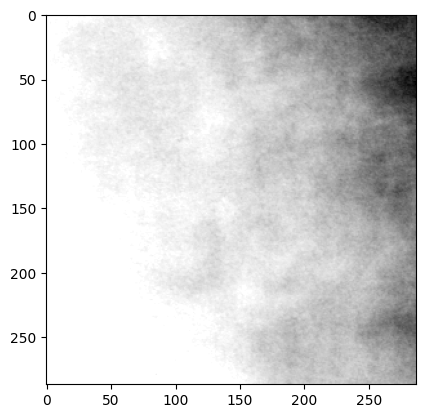

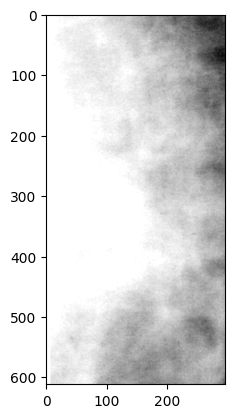

In [9]:
plt.imshow(patches[2], cmap='gray')
plt.show()

plt.imshow(patch, cmap='gray')
plt.show()